In [2]:
import pandas as pd
import time

In [3]:
df_osaka = pd.read_csv("osaka_metropolis_english.csv")
OBJECTIVE_VARIABLE = "approval_rate"
USE_EXPLANATORY = [
    '2_between_30to60',
    '3_male_ratio',
    '5_household_member',
    'latitude'
]
y = df_osaka[OBJECTIVE_VARIABLE].values
X = df_osaka[USE_EXPLANATORY].values

df_osaka[USE_EXPLANATORY + [OBJECTIVE_VARIABLE]]

,2_between_30to60,3_male_ratio,5_household_member,latitude,approval_rate
0,0.499141,0.485807,1.83,42.325,0.562728
1,0.425080,0.481006,2.10,42.078,0.526104
2,0.467986,0.473394,2.06,41.535,0.536686
3,0.411267,0.473798,2.20,40.197,0.496048
4,0.390663,0.473722,2.16,43.273,0.471734
5,0.419868,0.474112,2.25,42.190,0.504592
6,0.422815,0.475847,2.52,42.257,0.511019
7,0.342897,0.577474,1.75,38.090,0.492851
8,0.506583,0.468446,1.65,40.870,0.509798
9,0.496780,0.467432,1.96,40.575,0.538094


In [4]:
from sklearn.model_selection import train_test_split
seed = 42

X_cv, X_eval, y_cv, y_eval = train_test_split(X, y, test_size=0.25, random_state=seed)

In [6]:
from seaborn_analyzer import regplot
from lightgbm import LGBMRegressor
from sklearn.model_selection import KFold

params = {
    "objective": "regression",
    "metric": "rmse",
    "random_state": seed,
    "boosting_type": "gbdt",
    "n_estimators": 10000,
    "verbose": -1,
    "early_stopping_round": 10
}

model = LGBMRegressor(**params)

fit_params = {
    "eval_set": [(X_eval, y_eval)]
}

cv_number=0/3


/usr/local/lib/python3.11/site-packages/seaborn_analyzer/custom_reg_plot.py:1301: FutureWarning: The provided callable <function mean at 0xffffb04b1e40> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_heat_pivot = pd.pivot_table(data=df_heat, values='y_pred',
/usr/local/lib/python3.11/site-packages/seaborn_analyzer/custom_reg_plot.py:1301: FutureWarning: The provided callable <function mean at 0xffffb04b1e40> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_heat_pivot = pd.pivot_table(data=df_heat, values='y_pred',
/usr/local/lib/python3.11/site-packages/seaborn_analyzer/custom_reg_plot.py:1301: FutureWarning: The provided callable <function mean at 0xffffb04b1e40> is currently using DataFrameGroupBy.mean. In a future version o

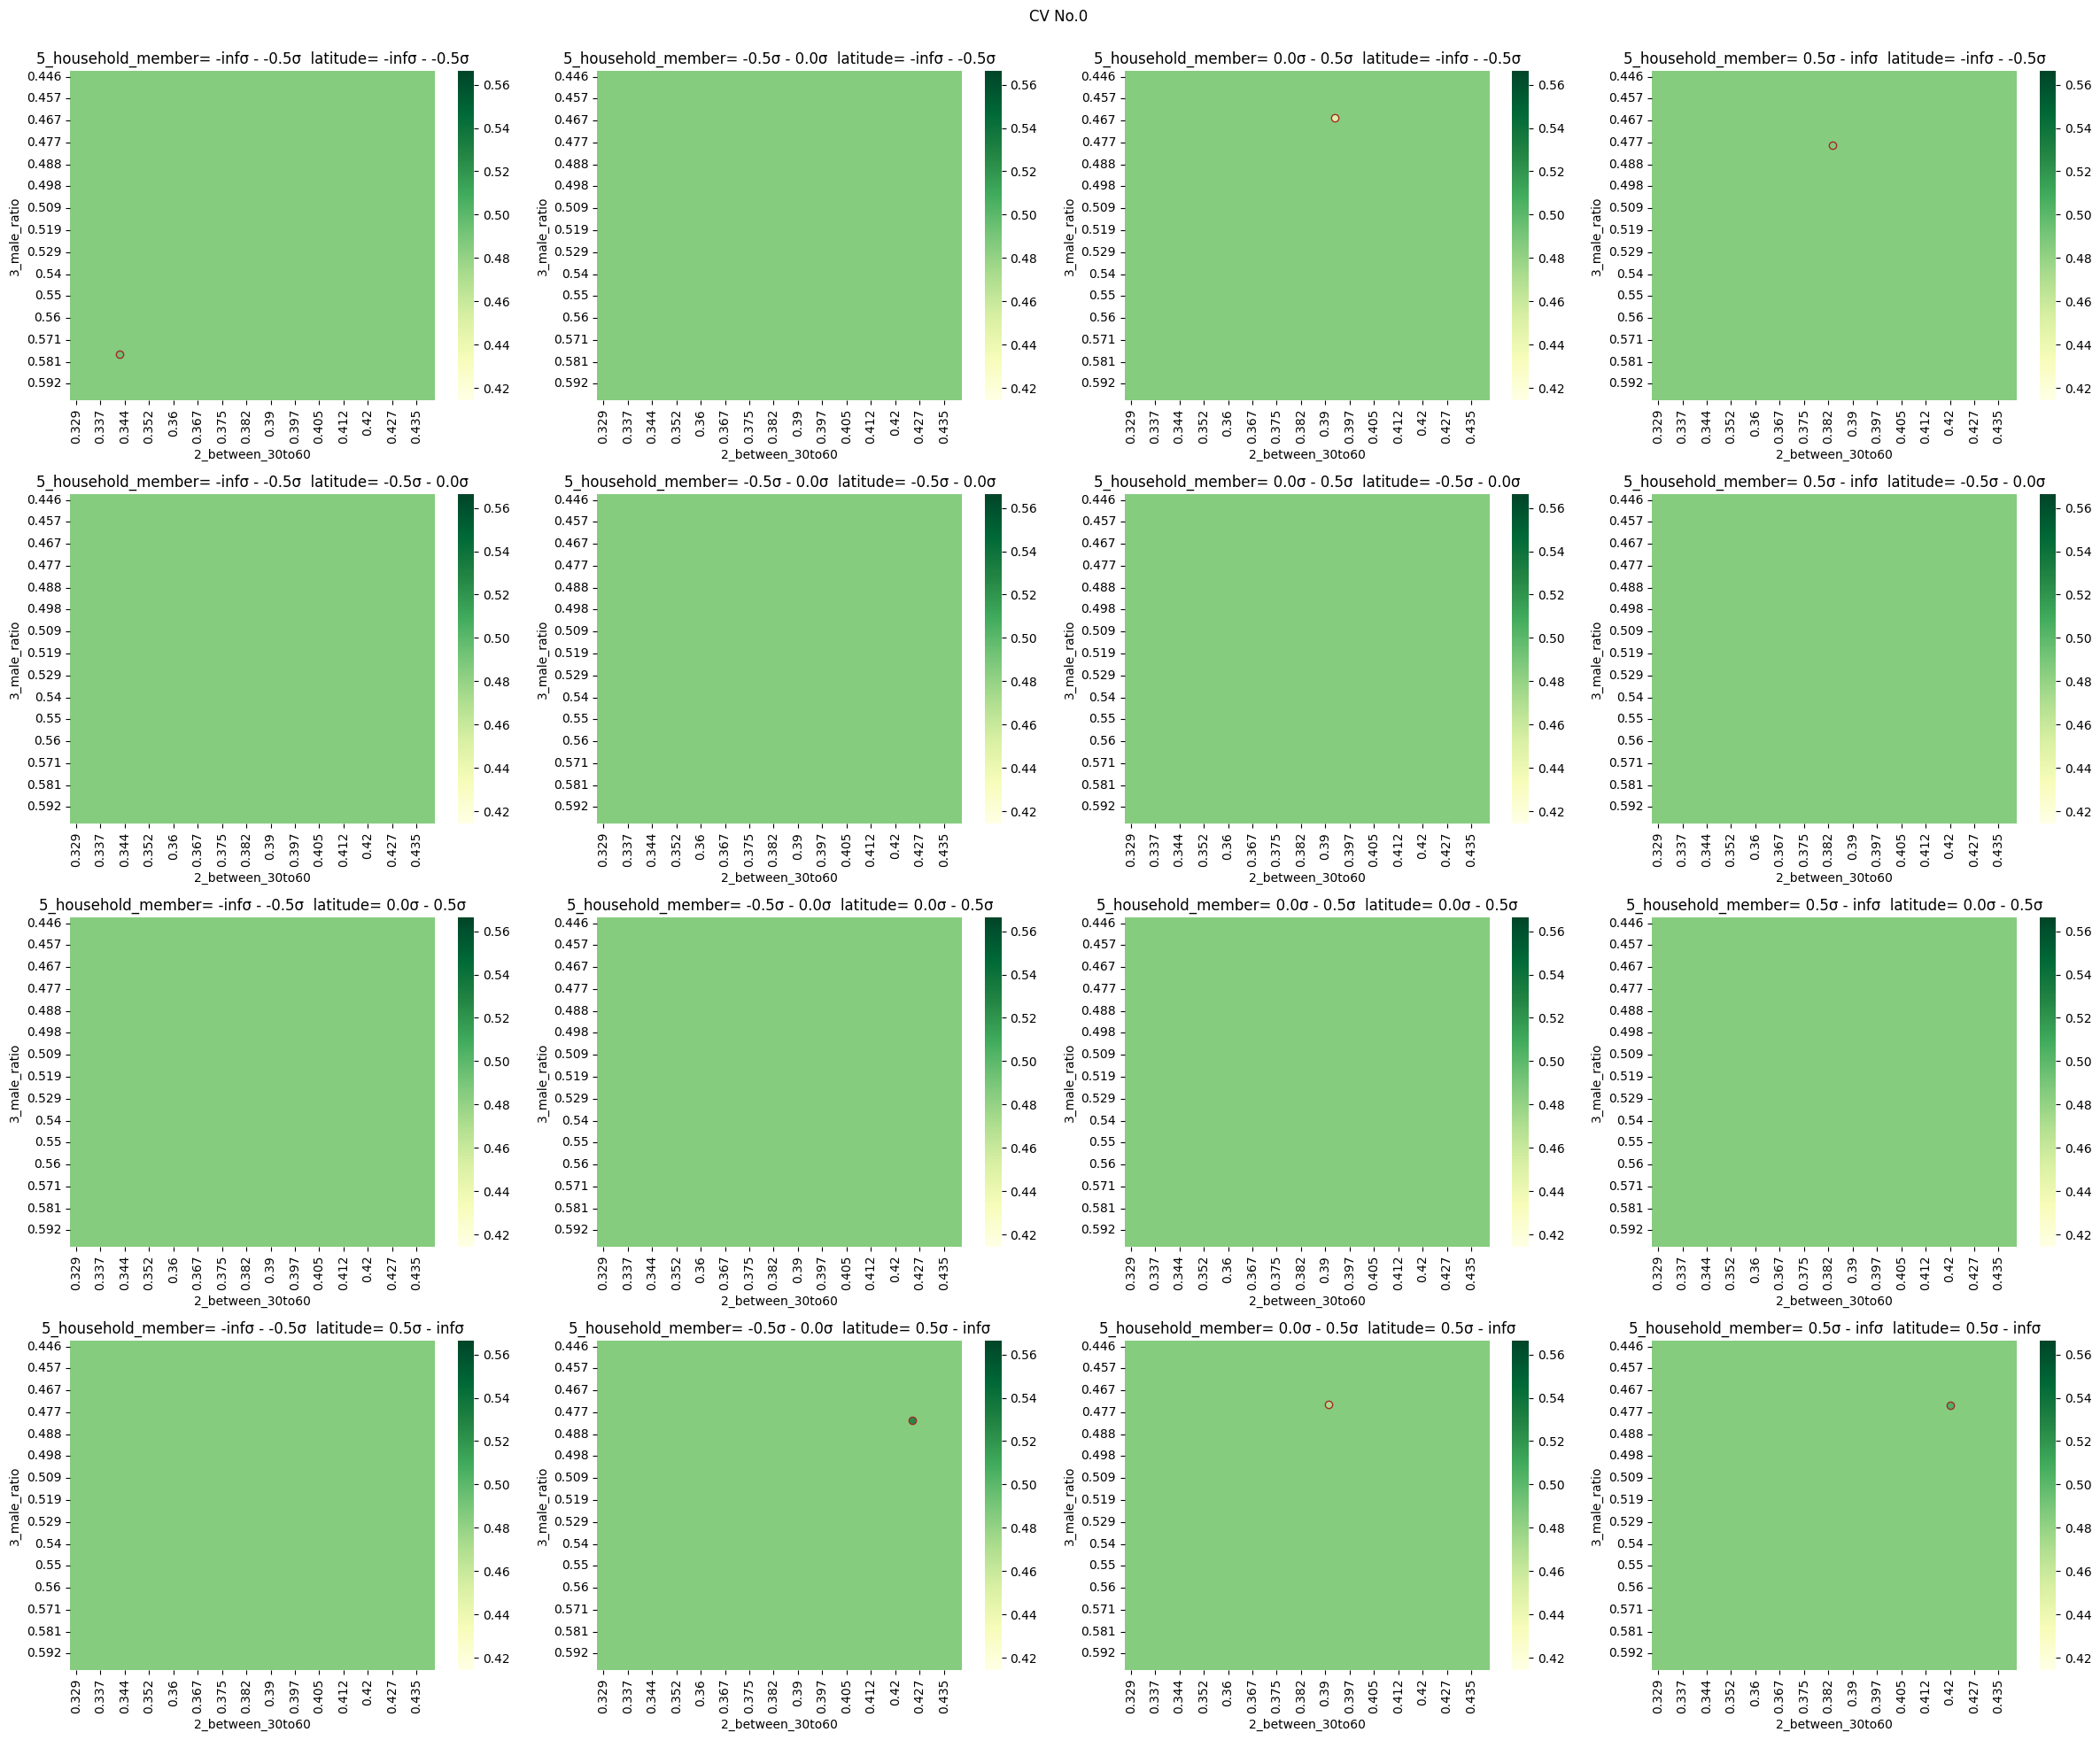

In [7]:
cv = KFold(n_splits=3, shuffle=True, random_state=seed)
regplot.regression_heat_plot(
    model,
    x=X_cv,
    y=y_cv,
    x_colnames=USE_EXPLANATORY,
    pair_sigmarange=0.5,
    rounddigit_x1=3,
    rounddigit_x2=3,
    cv=cv,
    display_cv_indices=0,
    fit_params=fit_params,
    validation_fraction=None
)

In [8]:
# score before tuning

from sklearn.model_selection import cross_val_score
import numpy as np

scoring = "neg_root_mean_squared_error"
scores = cross_val_score(model, X_cv, y_cv, cv=cv, scoring=scoring, n_jobs=-1, fit_params=fit_params)

print(f"scores: {scores}")
print(f"average_score: {np.mean(scores)}")

/usr/local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(


scores: [-0.02426901 -0.03971342 -0.0280086 ]
average_score: -0.030663676536520218


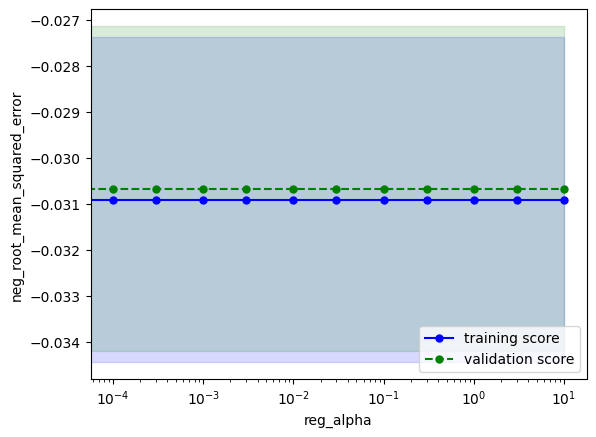

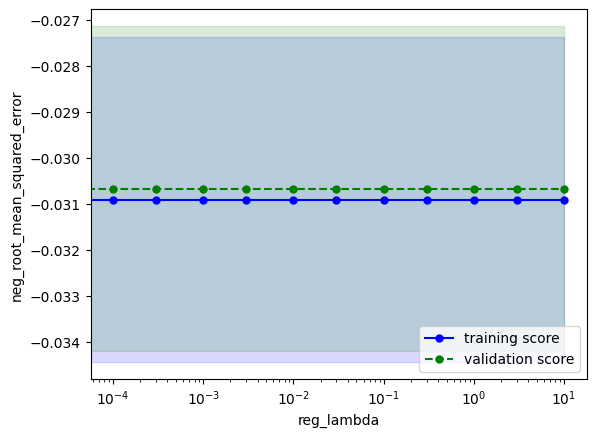

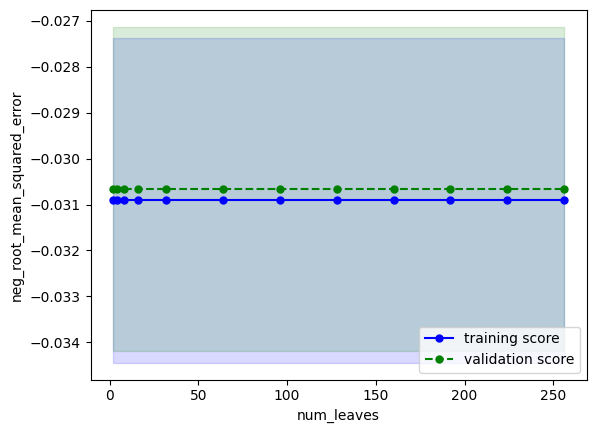

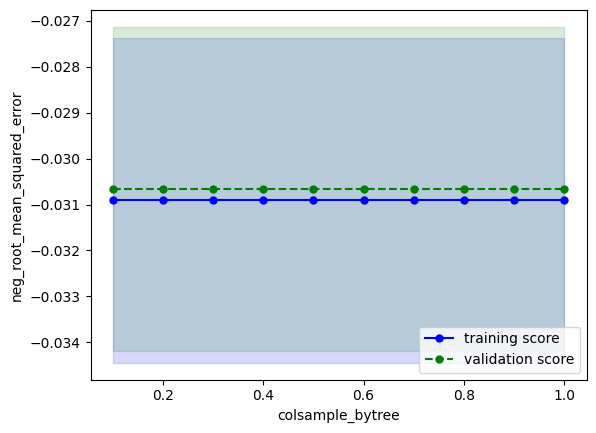

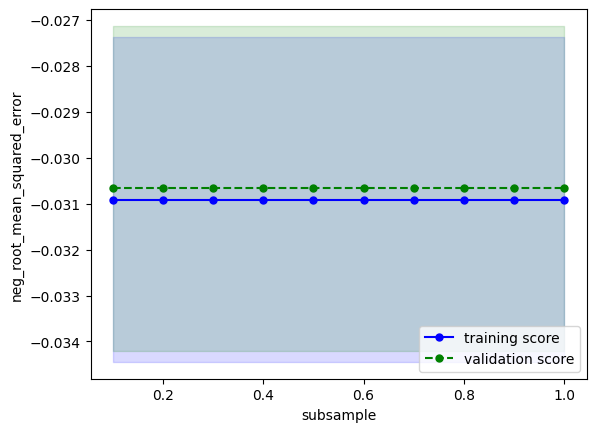

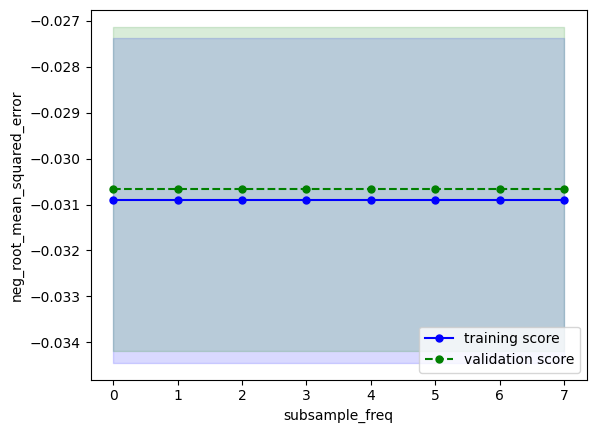

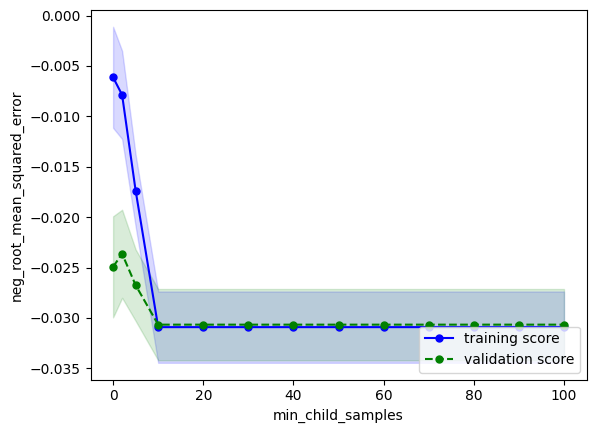

In [13]:
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt
cv_params = {
    'reg_alpha': [0, 0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10],
    'reg_lambda': [0, 0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10],
    'num_leaves': [2, 4, 8, 16, 32, 64, 96, 128, 160, 192, 224, 256],
    'colsample_bytree': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'subsample': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'subsample_freq': [0, 1, 2, 3, 4, 5, 6, 7],
    'min_child_samples': [0, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
}
param_scales = {
    'reg_alpha': 'log',
    'reg_lambda': 'log',
    'num_leaves': 'linear',
    'colsample_bytree': 'linear',
    'subsample': 'linear',
    'subsample_freq': 'linear',
    'min_child_samples': 'linear'
}

for i, (k, v) in enumerate(cv_params.items()):
    train_scores, valid_scores = validation_curve(
        estimator=model,
        X=X_cv,
        y=y_cv,
        param_name=k,
        param_range=v,
        fit_params=fit_params,
        cv=cv,
        scoring=scoring,
        n_jobs=-1
    )
    
    # average score +- sd based on training data
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    train_center = train_mean
    train_high = train_mean + train_std
    train_low = train_mean - train_std

    # average score +- sd based on data for validation
    valid_mean = np.mean(valid_scores, axis=1)
    valid_std = np.std(valid_scores, axis=1)
    valid_center = valid_mean
    valid_high = valid_mean + train_std
    valid_low = valid_mean - train_std

    plt.plot(v, train_center, color="blue", marker="o", markersize=5, label="training score")
    plt.fill_between(v, train_high, train_low, alpha=0.15, color="blue")
    
    plt.plot(v, valid_center, color="green", linestyle="--", marker="o", markersize=5, label="validation score")
    plt.fill_between(v, valid_high, valid_low, alpha=0.15, color="green")
    
    plt.xscale(param_scales[k])
    plt.xlabel(k)
    plt.ylabel(scoring)
    plt.legend(loc="lower right")
    plt.show()


In [14]:
# サンプル数23に対しmin_child_samples=20(default)が多すぎる。同様にnum_leaves=31も多すぎる
model.set_params(min_child_samples=5, num_leaves=2)

LGBMRegressor(early_stopping_round=10, metric='rmse', min_child_samples=5,
              n_estimators=10000, num_leaves=2, objective='regression',
              random_state=42, verbose=-1)

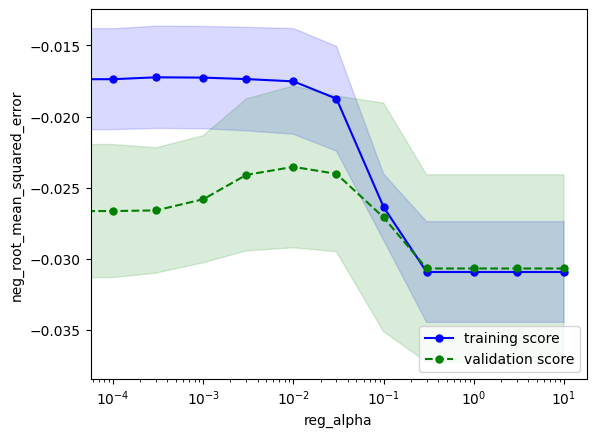

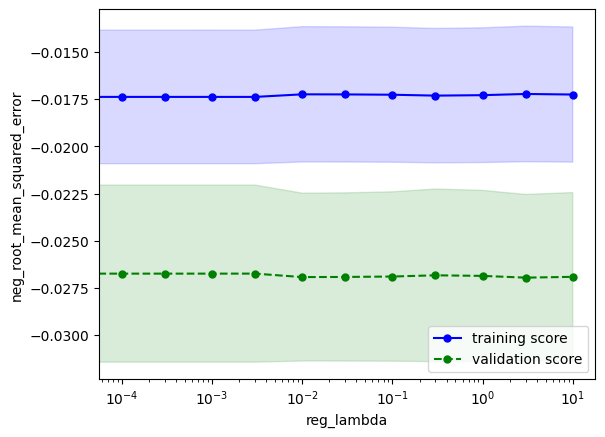

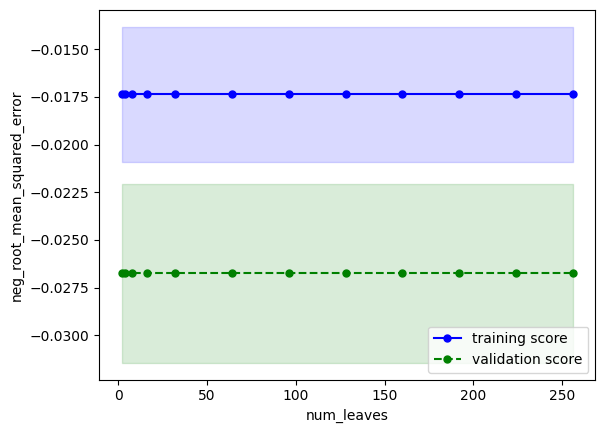

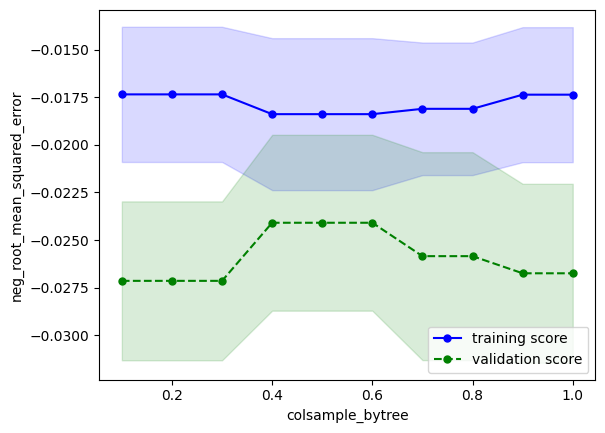

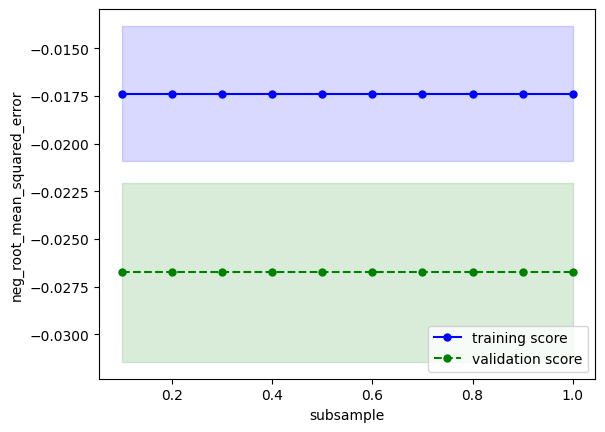

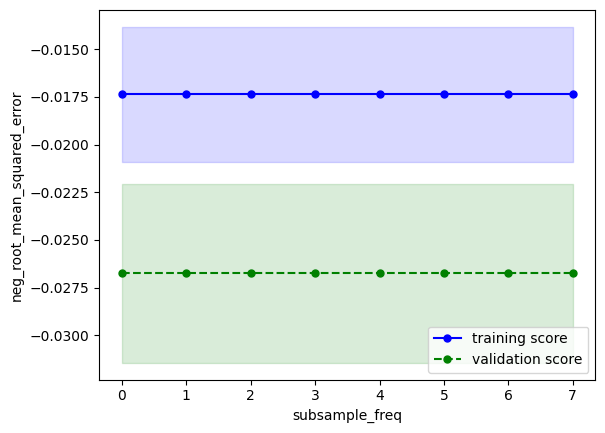

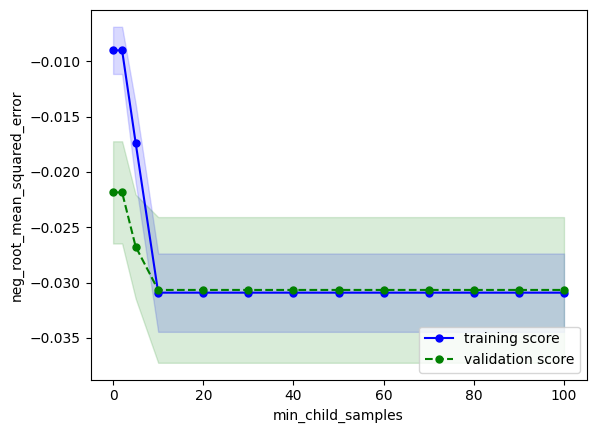

In [18]:
for i, (k, v) in enumerate(cv_params.items()):
    train_scores, valid_scores = validation_curve(estimator=model,
                                                  X=X_cv, y=y_cv,
                                                  param_name=k,
                                                  param_range=v,
                                                  fit_params=fit_params,
                                                  cv=cv, scoring=scoring,
                                                  n_jobs=-1)
    # 学習データに対するスコアの平均±標準偏差を算出
    train_mean = np.mean(train_scores, axis=1)
    train_std  = np.std(train_scores, axis=1)
    train_center = train_mean
    train_high = train_mean + train_std
    train_low = train_mean - train_std
    # テストデータに対するスコアの平均±標準偏差を算出
    valid_mean = np.mean(valid_scores, axis=1)
    valid_std  = np.std(valid_scores, axis=1)
    valid_center = valid_mean
    valid_high = valid_mean + valid_std
    valid_low = valid_mean - valid_std
    # training_scoresをプロット
    plt.plot(v, train_center, color='blue', marker='o', markersize=5, label='training score')
    plt.fill_between(v, train_high, train_low, alpha=0.15, color='blue')
    # validation_scoresをプロット
    plt.plot(v, valid_center, color='green', linestyle='--', marker='o', markersize=5, label='validation score')
    plt.fill_between(v, valid_high, valid_low, alpha=0.15, color='green')
    # スケールを'log'に（線形なパラメータは'linear'にするので注意）
    plt.xscale(param_scales[k])
    # 軸ラベルおよび凡例の指定
    plt.xlabel(k)  # パラメータ名を横軸ラベルに
    plt.ylabel(scoring)  # スコア名を縦軸ラベルに
    plt.legend(loc='lower right')  # 凡例
    # グラフを描画
    plt.show()

In [19]:
# Grid search

from sklearn.model_selection import GridSearchCV

start = time.time()

cv_params = {
    'reg_alpha': [0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1],
    'reg_lambda': [0.0001, 0.0003, 0.001, 0.003],
    'num_leaves': [2, 3, 4, 6],
    'colsample_bytree': [0.4, 0.5, 0.6],
    'subsample': [0.2, 1.0],
    'subsample_freq': [0, 7],
    'min_child_samples': [0, 2, 5, 10]
}

gridcv = GridSearchCV(model, cv_params, cv=cv, scoring=scoring, n_jobs=-1)
gridcv.fit(X_cv, y_cv, **fit_params)

best_params = gridcv.best_params_
best_score = gridcv.best_score_

print(f"best parameters: {best_params}")
print(f"best score: {best_score}")
print(f"time: {time.time() - start}s")


best parameters: {'colsample_bytree': 0.4, 'min_child_samples': 2, 'num_leaves': 4, 'reg_alpha': 0.001, 'reg_lambda': 0.003, 'subsample': 0.2, 'subsample_freq': 0}
best score: -0.021085785752966074
time: 1327.4686176776886s


In [22]:
# Bayesian optimization with Optuna

import optuna

def bayes_objective(trial):
    params = {
        "reg_alpha": trial.suggest_float("reg_alpha", 0.0001, 0.1, log=True),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.0001, 0.1, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 8),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.4, 1.0),
        "subsample": trial.suggest_float("subsample", 0.2, 1.0),
        "subsample_freq": trial.suggest_int("subsample_freq", 0, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 0, 10),
    }

    model.set_params(**params)
    scores = cross_val_score(model, X_cv, y_cv, cv=cv, scoring=scoring, fit_params=fit_params, n_jobs=-1)
    val = scores.mean()
    return val

study = optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler(seed=seed))
study.optimize(bayes_objective, n_trials=400)

best_params = study.best_trial.params
best_score = study.best_trial.value

print(f"best parameters: {best_params}")
print(f"best score: {best_score}")
print(f"time: {time.time() - start}s")

[I 2024-11-30 14:39:30,431] A new study created in memory with name: no-name-6f376ac9-e938-4bb3-bcd6-62d5a9a5e61d
[I 2024-11-30 14:39:30,489] Trial 0 finished with value: -0.020685745621668594 and parameters: {'reg_alpha': 0.0013292918943162175, 'reg_lambda': 0.07114476009343425, 'num_leaves': 7, 'colsample_bytree': 0.759195090518222, 'subsample': 0.3248149123539492, 'subsample_freq': 1, 'min_child_samples': 0}. Best is trial 0 with value: -0.020685745621668594.
[I 2024-11-30 14:39:30,636] Trial 1 finished with value: -0.021844084418712884 and parameters: {'reg_alpha': 0.0396760507705299, 'reg_lambda': 0.006358358856676255, 'num_leaves': 6, 'colsample_bytree': 0.41235069657748147, 'subsample': 0.9759278817295955, 'subsample_freq': 6, 'min_child_samples': 2}. Best is trial 0 with value: -0.020685745621668594.
[I 2024-11-30 14:39:30,680] Trial 2 finished with value: -0.030663676536520218 and parameters: {'reg_alpha': 0.0003511356313970409, 'reg_lambda': 0.0003549878832196505, 'num_leaves

best parameters: {'reg_alpha': 0.009345906048320715, 'reg_lambda': 0.08072408422666587, 'num_leaves': 8, 'colsample_bytree': 0.7181971227205796, 'subsample': 0.4148061184892381, 'subsample_freq': 1, 'min_child_samples': 1}
best score: -0.01903037732919405
time: 1810.8912436962128s


[LightGBM] [Fatal] Check failed: (num_data) > (0) at /LightGBM/lightgbm-python/src/io/dataset.cpp, line 39 .

[LightGBM] [Fatal] Check failed: (num_data) > (0) at /LightGBM/lightgbm-python/src/io/dataset.cpp, line 39 .

[LightGBM] [Fatal] Check failed: (num_data) > (0) at /LightGBM/lightgbm-python/src/io/dataset.cpp, line 39 .

/usr/local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
6 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **

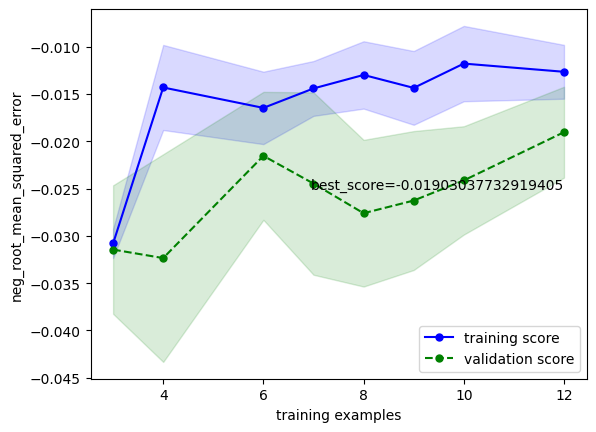

In [23]:
# learning curveで目標性能、過学習の有無の確認

from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
# 最適パラメータを学習器にセット
model.set_params(**best_params)

# 学習曲線の取得
train_sizes, train_scores, valid_scores = learning_curve(estimator=model,
                                                         X=X_cv, y=y_cv,
                                                         train_sizes=np.linspace(0.1, 1.0, 10),
                                                         fit_params=fit_params,
                                                         cv=cv, scoring=scoring, n_jobs=-1)
# 学習データ指標の平均±標準偏差を計算
train_mean = np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)
train_center = train_mean
train_high = train_mean + train_std
train_low = train_mean - train_std
# 検証データ指標の平均±標準偏差を計算
valid_mean = np.mean(valid_scores, axis=1)
valid_std  = np.std(valid_scores, axis=1)
valid_center = valid_mean
valid_high = valid_mean + valid_std
valid_low = valid_mean - valid_std
# training_scoresをプロット
plt.plot(train_sizes, train_center, color='blue', marker='o', markersize=5, label='training score')
plt.fill_between(train_sizes, train_high, train_low, alpha=0.15, color='blue')
# validation_scoresをプロット
plt.plot(train_sizes, valid_center, color='green', linestyle='--', marker='o', markersize=5, label='validation score')
plt.fill_between(train_sizes, valid_high, valid_low, alpha=0.15, color='green')
# 最高スコアの表示
best_score = valid_center[len(valid_center) - 1]
plt.text(np.amax(train_sizes), valid_low[len(valid_low) - 1], f'best_score={best_score}',
                color='black', verticalalignment='top', horizontalalignment='right')
# 軸ラベルおよび凡例の指定
plt.xlabel('training examples')  # 学習サンプル数を横軸ラベルに
plt.ylabel(scoring)  # スコア名を縦軸ラベルに
plt.legend(loc='lower right')  # 凡例

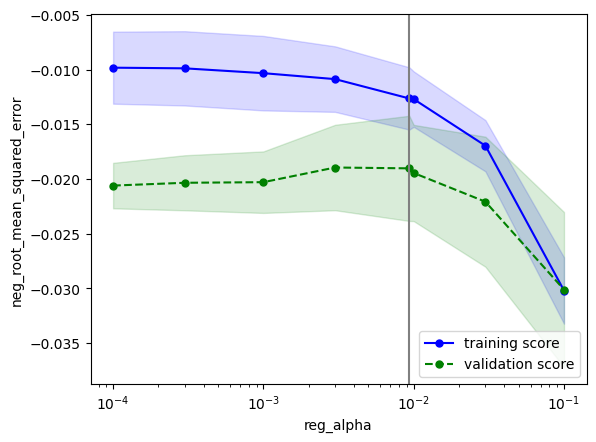

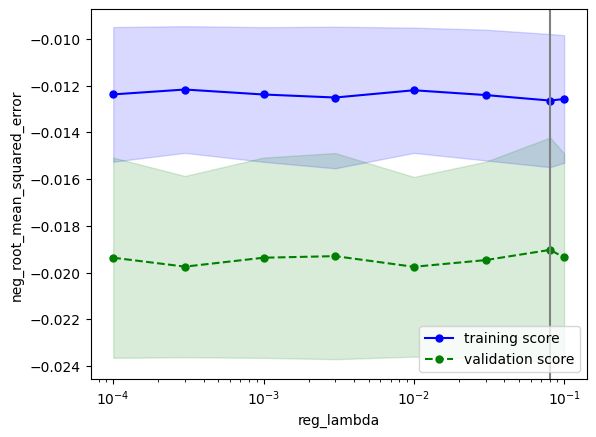

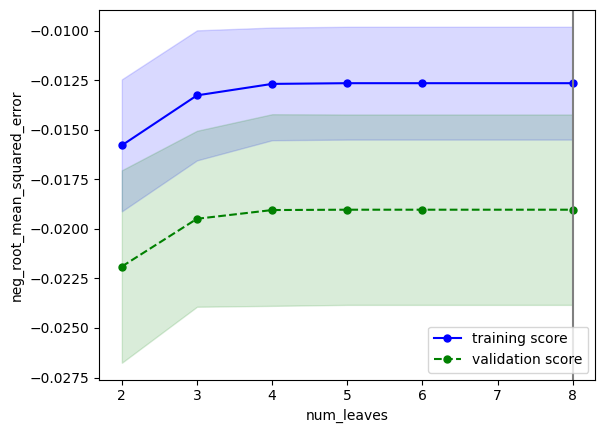

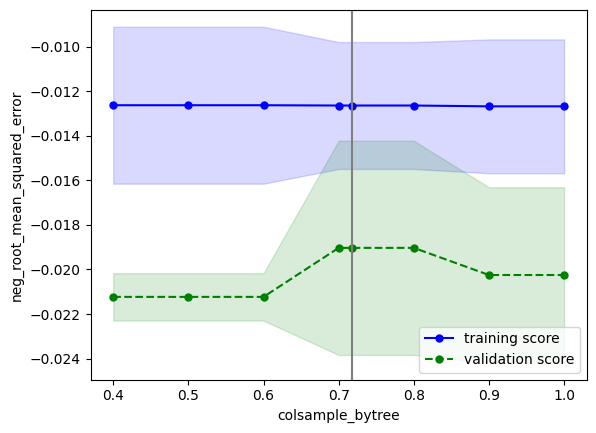

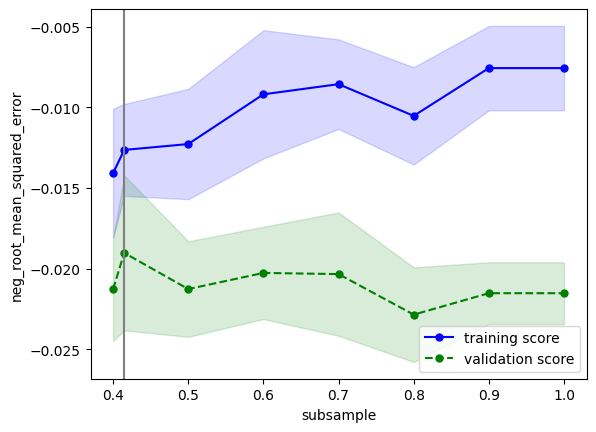

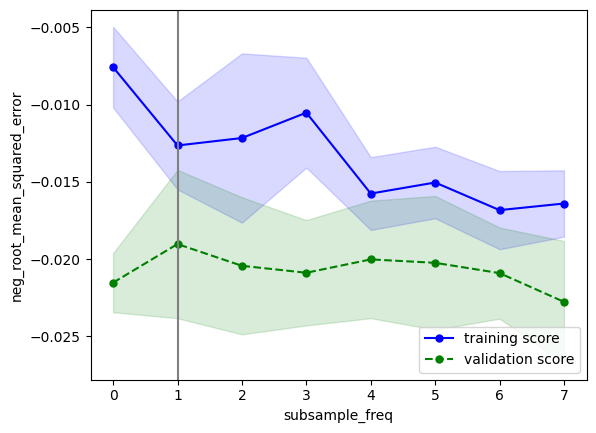

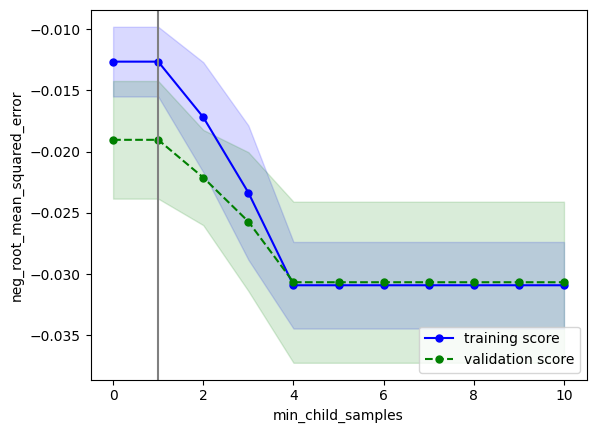

In [24]:
# validation curveで最適化したパラメータが性能の最大値を捉えられているか、過学習していないかを確認

from sklearn.model_selection import validation_curve
# 検証曲線描画対象パラメータ
valid_curve_params = {'reg_alpha': [0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1],
                      'reg_lambda': [0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1],
                      'num_leaves': [2, 3, 4, 5, 6],
                      'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                      'subsample': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                      'subsample_freq': [0, 1, 2, 3, 4, 5, 6, 7],
                      'min_child_samples': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
                      }
param_scales = {'reg_alpha': 'log',
                'reg_lambda': 'log',
                'num_leaves': 'linear',
                'colsample_bytree': 'linear',
                'subsample': 'linear',
                'subsample_freq': 'linear',
                'min_child_samples': 'linear'
                }
# 最適パラメータを上記描画対象に追加
for k, v in valid_curve_params.items():
    if best_params[k] not in v:
        v.append(best_params[k])
        v.sort()
for i, (k, v) in enumerate(valid_curve_params.items()):
    # モデルに最適パラメータを適用
    model.set_params(**best_params)
    # 検証曲線を描画
    train_scores, valid_scores = validation_curve(estimator=model,
                                                  X=X_cv, y=y_cv,
                                                  param_name=k,
                                                  param_range=v,
                                                  fit_params=fit_params,
                                                  cv=cv, scoring=scoring,
                                                  n_jobs=-1)
    # 学習データに対するスコアの平均±標準偏差を算出
    train_mean = np.mean(train_scores, axis=1)
    train_std  = np.std(train_scores, axis=1)
    train_center = train_mean
    train_high = train_mean + train_std
    train_low = train_mean - train_std
    # テストデータに対するスコアの平均±標準偏差を算出
    valid_mean = np.mean(valid_scores, axis=1)
    valid_std  = np.std(valid_scores, axis=1)
    valid_center = valid_mean
    valid_high = valid_mean + valid_std
    valid_low = valid_mean - valid_std
    # training_scoresをプロット
    plt.plot(v, train_center, color='blue', marker='o', markersize=5, label='training score')
    plt.fill_between(v, train_high, train_low, alpha=0.15, color='blue')
    # validation_scoresをプロット
    plt.plot(v, valid_center, color='green', linestyle='--', marker='o', markersize=5, label='validation score')
    plt.fill_between(v, valid_high, valid_low, alpha=0.15, color='green')
    # 最適パラメータを縦線表示
    plt.axvline(x=best_params[k], color='gray')
    # スケールをparam_scalesに合わせて変更
    plt.xscale(param_scales[k])
    # 軸ラベルおよび凡例の指定
    plt.xlabel(k)  # パラメータ名を横軸ラベルに
    plt.ylabel(scoring)  # スコア名を縦軸ラベルに
    plt.legend(loc='lower right')  # 凡例
    # グラフを描画
    plt.show()


cv_number=0/3


/usr/local/lib/python3.11/site-packages/seaborn_analyzer/custom_reg_plot.py:1301: FutureWarning: The provided callable <function mean at 0xffffb04b1e40> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_heat_pivot = pd.pivot_table(data=df_heat, values='y_pred',
/usr/local/lib/python3.11/site-packages/seaborn_analyzer/custom_reg_plot.py:1301: FutureWarning: The provided callable <function mean at 0xffffb04b1e40> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_heat_pivot = pd.pivot_table(data=df_heat, values='y_pred',
/usr/local/lib/python3.11/site-packages/seaborn_analyzer/custom_reg_plot.py:1301: FutureWarning: The provided callable <function mean at 0xffffb04b1e40> is currently using DataFrameGroupBy.mean. In a future version o

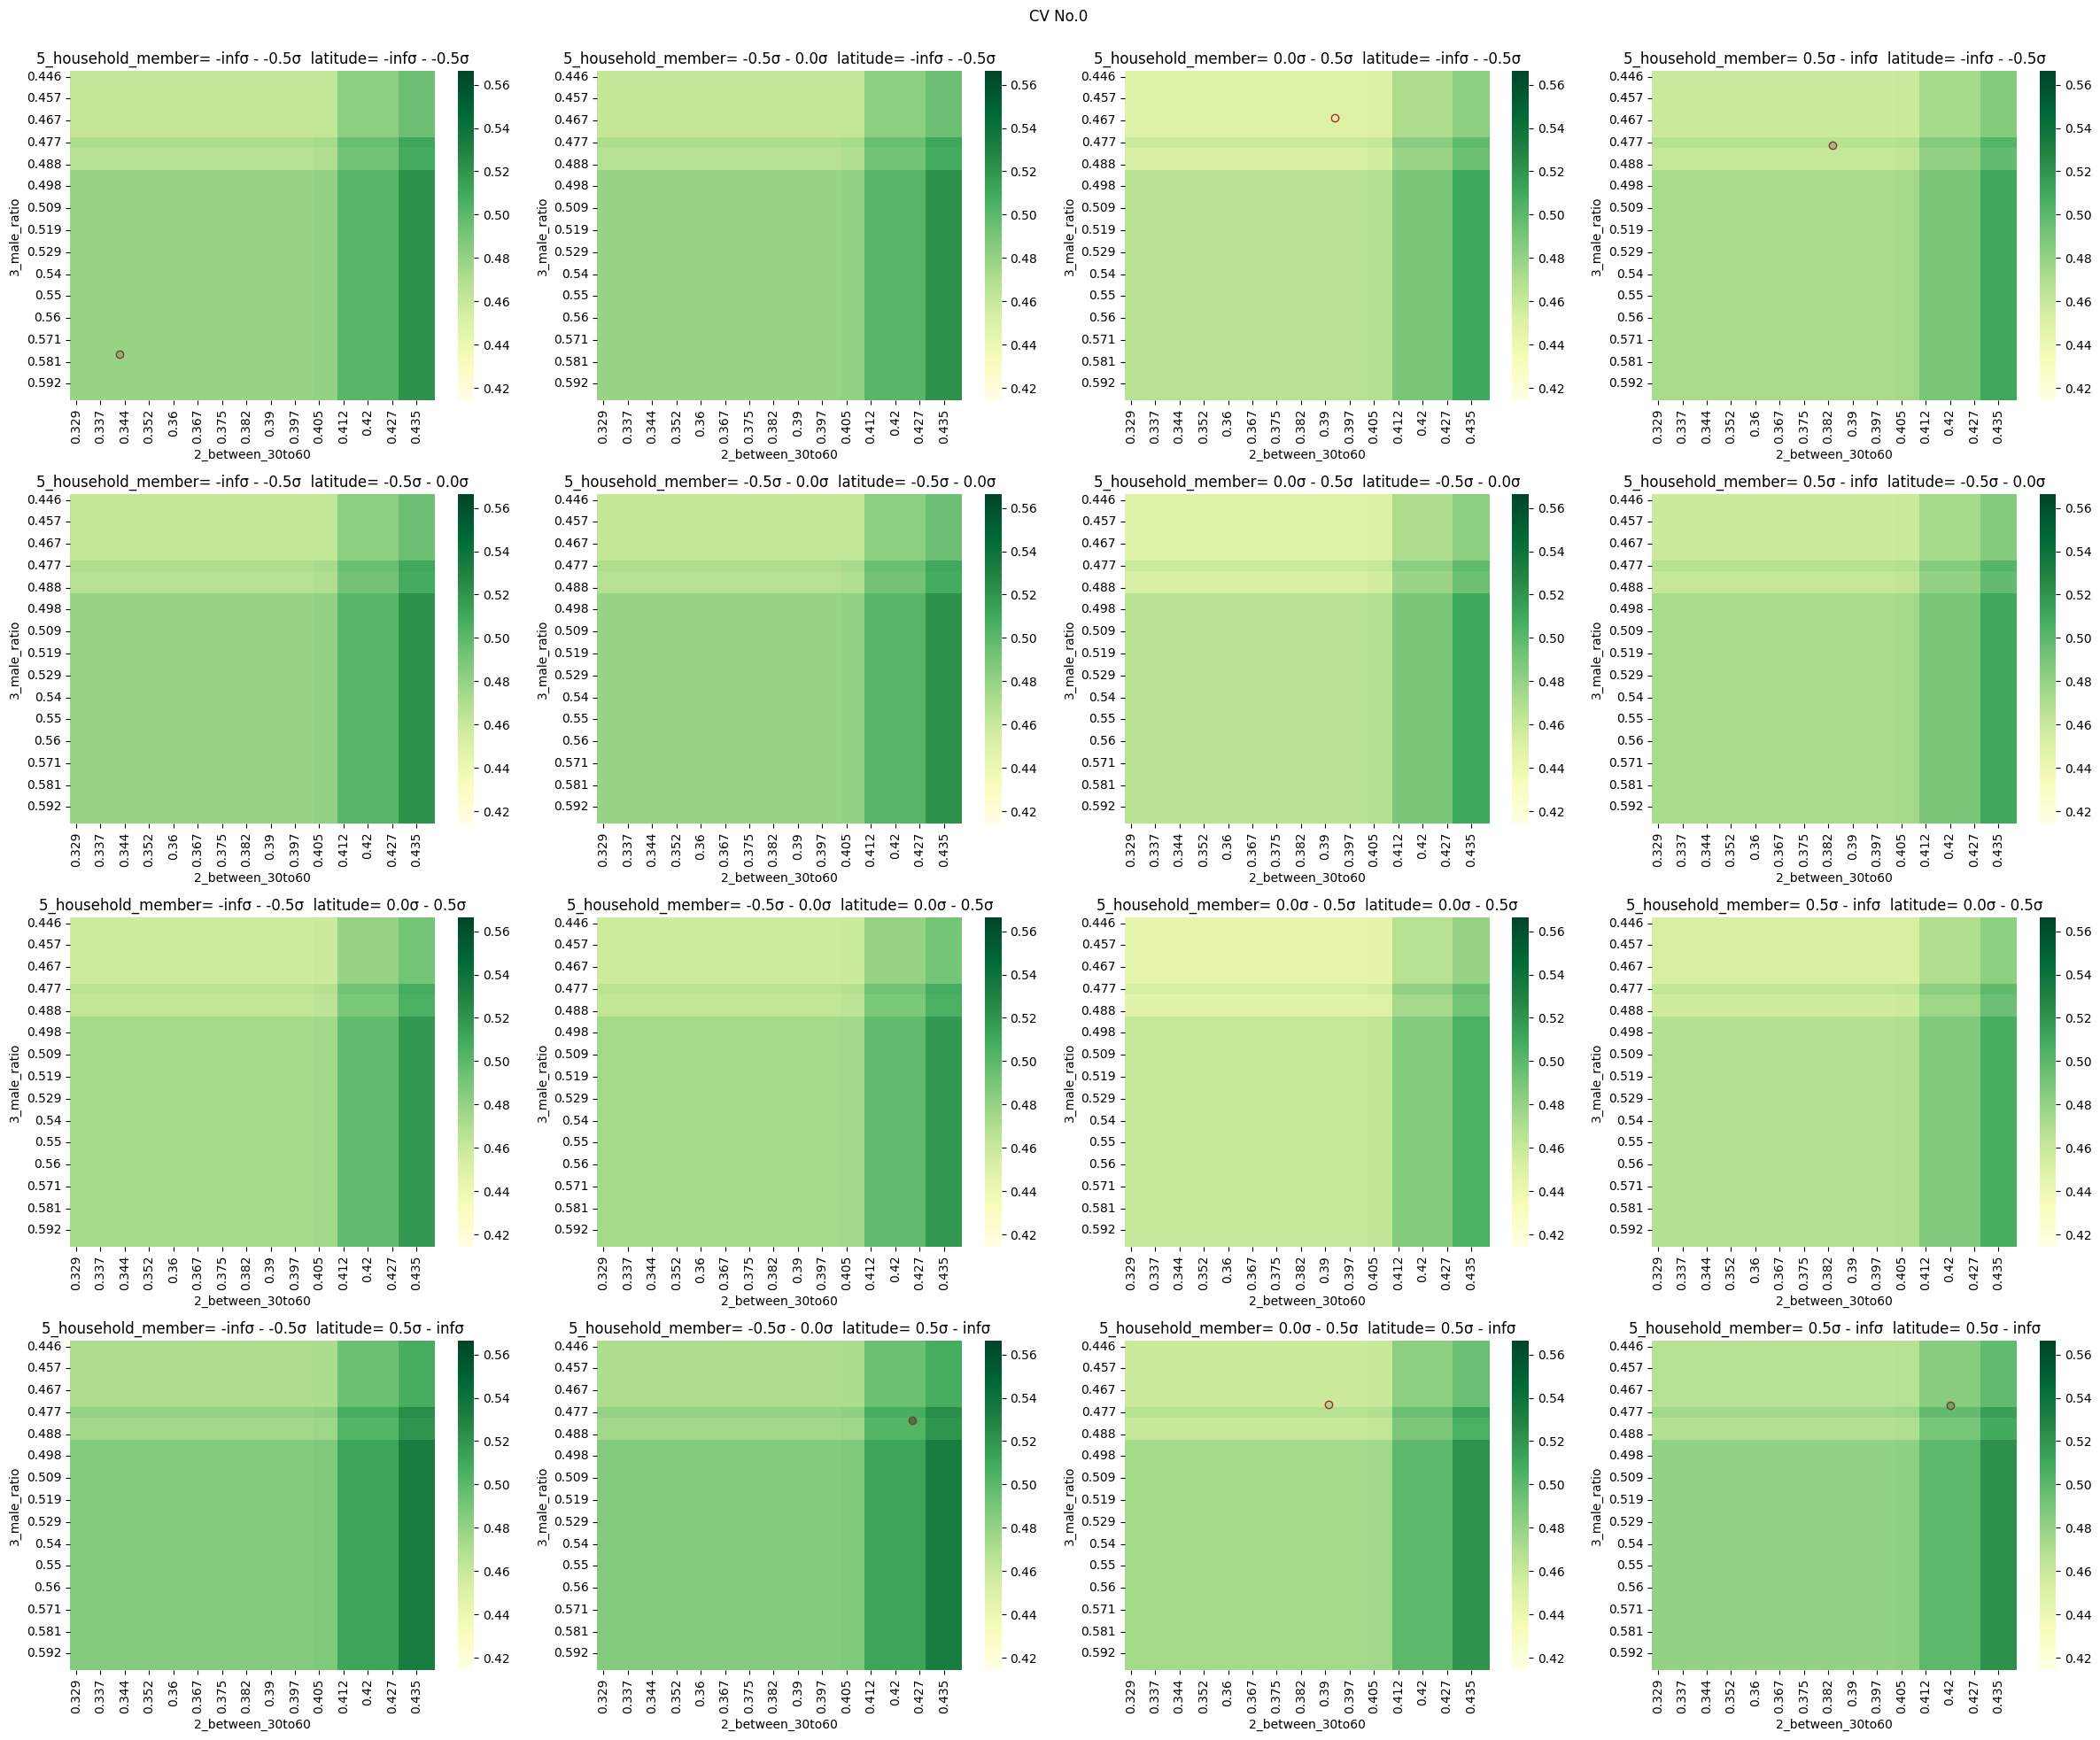

In [25]:
regplot.regression_heat_plot(model, x=X_cv, y=y_cv, x_colnames=USE_EXPLANATORY,
                             pair_sigmarange = 0.5, rounddigit_x1=3, rounddigit_x2=3,
                             cv=cv, display_cv_indices=0,
                             fit_params=fit_params, estimator_params=best_params)